# 한중마라 리뷰 크롤링

#### beautifulsoup4, selenium 설치

In [79]:
#!pip3 install beautifulsoup4

In [80]:
#!pip install selenium

#### 필요한 패키지 임폴트

In [81]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from time import sleep
import requests
import re
import pandas as pd
import numpy as np
import os
import time
import urllib.request
from selenium.webdriver.common.keys import Keys

import warnings
warnings.filterwarnings('ignore')

#### 셀레니움을 이용해 크롬드라이브 제어 및 url 가져오기

In [82]:
#/Applications/Google Chrome.app/Contents/MacOS/Google Chrome
from selenium import webdriver

driver = webdriver.Chrome()
driver.get("https://m.place.naver.com/restaurant/1206426590/review/visitor?entry=ple")
#time.sleep(2)

In [83]:
#driver.find_element('xpath','//*[@id="app-root"]/div/div/div/div[5]/div/div/div/div/a[5]').click()

In [84]:
driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')

In [85]:
prev_height = driver.execute_script('return document.body.scrollHeight')

#### 웹자동화 : 더보기 -> 스크롤 반복

In [97]:
while True:
    try:
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(3)

        current_height = driver.execute_script('return document.body.scrollHeight')

        
        driver.find_element('xpath','//*[@id="app-root"]/div/div/div/div[7]/div[2]/div[3]/div[2]/a').click()
        
        
        if prev_height == current_height:
            break
              
        prev_height = current_height
        #time.sleep(1)
    except:
        print("마지막 페이지입니다.")
        break
        
#driver.quit()
        

마지막 페이지입니다.


#### 현재페이지의 html 코드 가져오기
    여기서 에러가 발생... 
    모든 리뷰가 코드에 반영되어 있지만 가져오지 못함 
    * 해결방법: driver.page_source를 이용해 현재 페이지 코드를 가져올 수 있었음

<html lang="ko"><head>
<title>네이버 플레이스</title>
<meta charset="utf-8"/>
<meta content="ie=edge" httpequiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, shrink-to-fit=no" id="_viewport" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-72.png" rel="icon" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-96.png" rel="icon" sizes="96x96" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-144.png" rel="icon" sizes="144x144" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-192.png" rel="icon" sizes="192x192" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-120.png" rel="apple-touch-icon"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-180.png" re
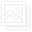
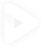
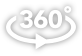
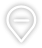

In [104]:
soup = BeautifulSoup(driver.page_source,'html.parser')
soup

In [88]:
reviews = soup.find('a',{'class':'xHaT3'}).get_text()
reviews

'대전에 새로 이사 와서 찾은 집 근처 맛집!!! 첫번째!!!  마라탕과 꿔바로우 현지 지인 베스트 추천!!! 다음엔 마라의 알싸한 매운 맛을  한단계 더 높여서 3단계 도전!!! 한가지 아쉬운 점 내가 좋아하는 고\n수가 없어요ㅠㅠ 맛있게 잘 먹었습니다~~~^^  내용 더보기'

In [99]:
reviews = soup.find('li',{'class':'YeINN'})
len(reviews)

5

In [100]:
reviews = soup.find_all('ul',{'class':'eCPGL'})
reviews

[<ul class="eCPGL"><li class="YeINN"><div class="Lia3P"><a class="DqSJm" href="https://m.place.naver.com/my/5de647f69ec8258e4a961e74/review?v=2" role="button" target="_blank"><div class="place_thumb"><img alt="프로필" class="sKXBJ" height="38" src="https://g-place.pstatic.net/assets/shared/images/icon_default_profile.png" width="38"/></div></a><a class="Hazns" href="https://m.place.naver.com/my/5de647f69ec8258e4a961e74/review?v=2" role="button" target="_blank"><div class="sBWyy">카르페윤</div><div class="Qde7Q"><span class="P1zUJ">리뷰 <!-- -->71</span><span class="P1zUJ">사진 <!-- -->91</span></div></a><a class="wFqB7" href="#" role="button">팔로우</a></div><div class="Mmpzx"><div class="ngGKH"><div class="flicking-viewport" style="user-select: none; -webkit-user-drag: none; touch-action: pan-y;"><div class="flicking-camera" style="transform: translate(0px);"><div class="ODalI"><a class="v3j4Z" href="#" role="button"><div class="K0PDV _img fKa0W" style='width: 100%; height: 100%; background-image: 

#### 뷰티풀수프의 find_all 을 통해 전체 리뷰 가져오기

In [105]:
reviews = soup.find_all('div',{'class':'ZZ4OK IwhtZ'})
reviews
#zPfVt
#ZZ4OK IwhtZ

[<div class="ZZ4OK IwhtZ"><a aria-expanded="false" class="xHaT3" href="#" role="button" style="display: block;"><span class="zPfVt">대전에 새로 이사 와서 찾은 집 근처 맛집!!! 첫번째!!!  마라탕과 꿔바로우 현지 지인 베스트 추천!!! 다음
 엔 마라의 알싸한 매운 맛을  한단계 더 높여서 3단계 도전!!! 한가지 아쉬운 점 내가 좋아하는 고수가 없
 어요ㅠㅠ 맛있게 잘 먹었습니다~~~^^  </span><span class="rvCSr"><svg aria-hidden="true" class="Ky28p" viewbox="0 0 12 7" xmlns="http://www.w3.org/2000/svg"><path d="M11.47.52a.74.74 0 00-1.04 0l-4.4 4.45v.01L1.57.52A.74.74 0 10.53 1.57l5.12 5.08a.5.5 0 00.7 0l5.12-5.08a.74.74 0 000-1.05z"></path></svg><span class="place_blind">내용 더보기</span></span></a></div>,
 <div class="ZZ4OK IwhtZ"><a aria-expanded="false" class="xHaT3" href="#" role="button" style="display: block;"><span class="zPfVt">맛있긴합니다만ㅠㅠ야채선택해서(숙주)  준것보다 넘작게들어있는것같아요~숙주를좋아해서 좀과하다싶을정도로 많이했는데..요리되어나온 숙주양이 넘 형편없이 적었어요..매장에서 말할까 몇번이나 망설였는데..기분은 별로네요ㅠㅠ</span></a></div>,
 <div class="ZZ4OK IwhtZ"><a aria-expanded="false" class="xHaT3" href="#" role="button" style="display: block;"><span class=

In [103]:
reviews = soup.find_all('span',{'class':'zPfVt'})
reviews

[<span class="zPfVt">대전에 새로 이사 와서 찾은 집 근처 맛집!!! 첫번째!!!  마라탕과 꿔바로우 현지 지인 베스트 추천!!! 다음엔 마라의 알싸한 매운 맛을  한단계 더 높여서 3단계 도전!!! 한가지 아쉬운 점 내가 좋아하는 고
 수가 없어요ㅠㅠ 맛있게 잘 먹었습니다~~~^^  </span>,
 <span class="zPfVt">맛있긴합니다만ㅠㅠ야채선택해서(숙주)  준것보다 넘작게들어있는것같아요~숙주를좋아해서 좀과하다싶을정도로 많이했는데..요리되어나온 숙주양이 넘 형편없이 적었어요..매장에서 말할까 몇번이나 망설였는데..기분은 별로네요ㅠㅠ</span>,
 <span class="zPfVt">정말 맛있습니다^^~</span>,
 <span class="zPfVt">친구랑 갔는데 가성비 좋고 깨끗하고 좋았어요 친구는 맛있었다고 했지만 제 취향은 아니에요.. 호불호가 좀 갈리는것 같아요  가성비는 좋았어요</span>,
 <span class="zPfVt">양고기추가에 기름기가 없고 너무 좋아요</span>,
 <span class="zPfVt">우리집 근처 맛집 중 하나로 선정 중~ 중국 교포 가족이 운영하는 듯~ 친절하고 깨끗하고 맛있다 아쉬운건 딱 하나! 고수가 없다 ㅠㅠ</span>,
 <span class="zPfVt">깔끔하고 친절하시네요</span>,
 <span class="zPfVt">마라 맛있어요!!</span>,
 <span class="zPfVt">맛있어요. 자주 가는 곳이에요!!</span>]

In [106]:
len(reviews)

136

#### 리뷰를 데이터프레임화 시켜 엑셀파일로 저장

In [126]:
review_list = []

for review in reviews:
    comment = review.get_text()
    review_list.append(comment)

#.get_text().strip()

df2 = pd.DataFrame({'review':review_list})

In [127]:
df2

,review
0,대전에 새로 이사 와서 찾은 집 근처 맛집!!! 첫번째!!! 마라탕과 꿔바로우 현...
1,맛있긴합니다만ㅠㅠ야채선택해서(숙주)  준것보다 넘작게들어있는것같아요~숙주를좋아해서 ...
2,정말 맛있습니다^^~
3,친구랑 갔는데 가성비 좋고 깨끗하고 좋았어요 친구는 맛있었다고 했지만 제 취향은 아...
4,양고기추가에 기름기가 없고 너무 좋아요
...,...
131,굳
132,굳
133,맛잇음
134,마라탕 굳굳


In [125]:
df2.head(15)

,review
0,대전에 새로 이사 와서 찾은 집 근처 맛집!!! 첫번째!!! 마라탕과 꿔바로우 현...
1,맛있긴합니다만ㅠㅠ야채선택해서(숙주)  준것보다 넘작게들어있는것같아요~숙주를좋아해서 ...
2,정말 맛있습니다^^~
3,친구랑 갔는데 가성비 좋고 깨끗하고 좋았어요 친구는 맛있었다고 했지만 제 취향은 아...
4,양고기추가에 기름기가 없고 너무 좋아요
5,우리집 근처 맛집 중 하나로 선정 중~ 중국 교포 가족이 운영하는 듯~ 친절하고 깨...
6,깔끔하고 친절하시네요
7,마라 맛있어요!!
8,맛있어요. 자주 가는 곳이에요!!
9,맛있어서 자주가요


In [114]:
df2.shape[0]

136

In [130]:
df2.to_excel('Hanjoung_Mara_review.xlsx')

In [129]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/152.7 kB 3.5 MB/s eta 0:00:00a 0:00:01
